In [1]:
using HierarchicalDriving
import POMDPs:initial_state
using POMDPToolbox
using Interact
using MCTS
using AutoViz
import ParticleFilters: obs_weight
import Base: ==, +, *, -, <, >, copy, Random, hash

In [17]:
n = 120
i = 89

89

In [18]:
p = SimulationMDP(n);

Interact.Options{:SelectionSlider,Int64}(Signal{Int64}(13, nactions=1),"i",13,"13",Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…),Dict(18=>"18",2=>"2",16=>"16",11=>"11",21=>"21",7=>"7",9=>"9",25=>"25",10=>"10",26=>"26"…)),Any[],Any[],true,"horizontal")

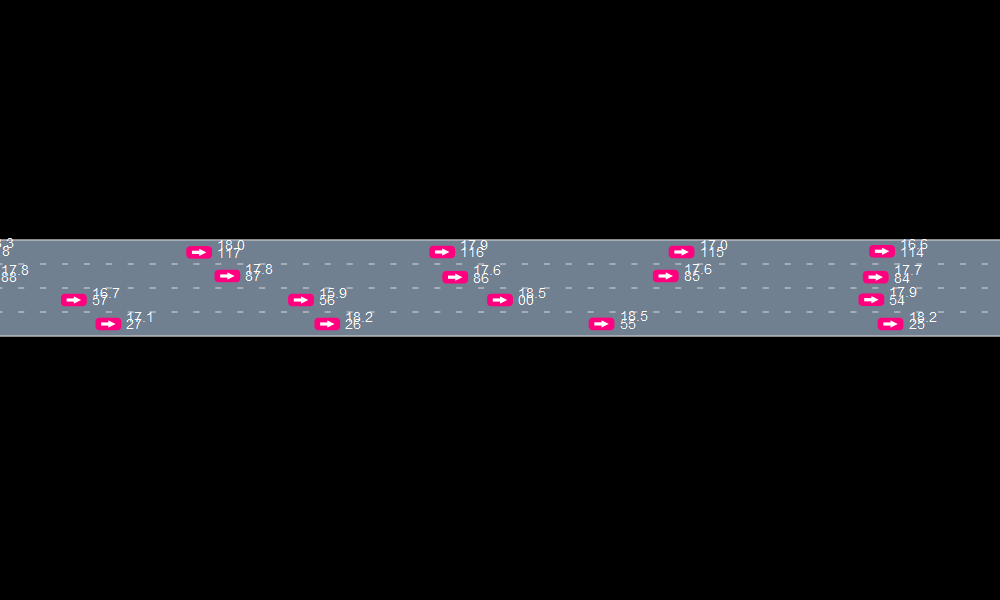

In [19]:
policyFileName = "../scratch/SingleAgentGrid/SingleAgentGridPolicy.jld"
hf1 = HierarchicalFramework1(p, policyFileName)
rng = MersenneTwister(i*29+1)
hp1 = HierarchicalPolicy1(hf1)
hr = HistoryRecorder(max_steps = 150, rng = rng)
hist = simulate(hr, p, hp1);
@manipulate for i in 1:n_steps(hist)+1
    (p,state_hist(hist)[i],SceneOverlay[CarVelOverlay(), CarIDOverlay()])
end

targetLane still 0


Interact.Options{:SelectionSlider,Int64}(Signal{Int64}(30, nactions=1),"i",30,"30",Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…),Dict(2=>"2",11=>"11",39=>"39",46=>"46",25=>"25",55=>"55",42=>"42",29=>"29",58=>"58",59=>"59"…)),Any[],Any[],true,"horizontal")

targetLane still 0
targetLane still 0
targetLane still 0
targetLane still 0
targetLane still 0
targetLane still 0
targetLane still 0
targetLane still 0
targetLane still 0
targetLane still 0
targetLane still 0
targetLane still 0
targetLane still 0
targetLane still 0
targetLane still 0
targetLane still 0


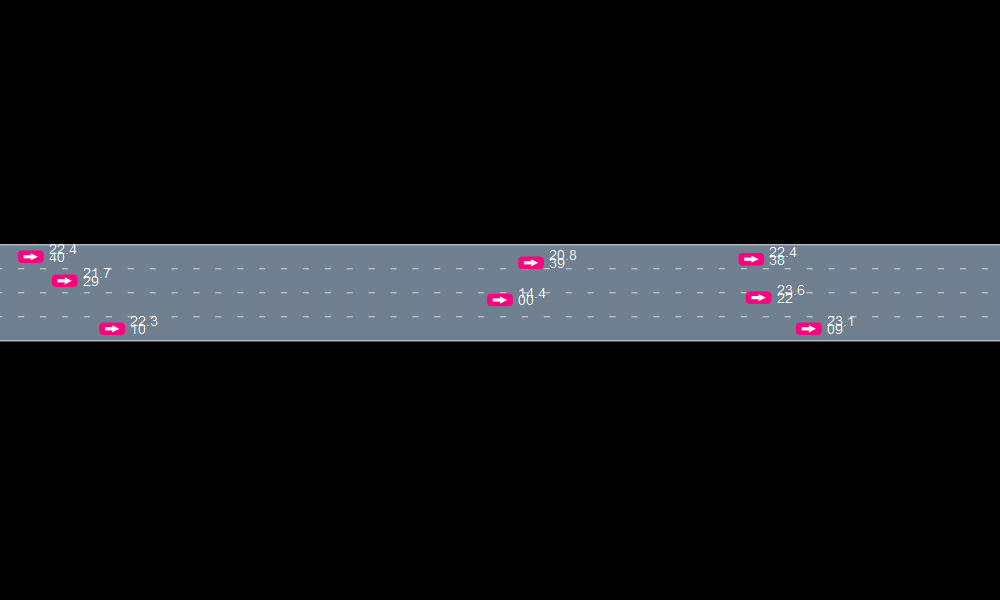

In [4]:
rng = MersenneTwister(i*29+1)
policy1 = subintentional_simulation_policy(p, rng)
hr1 = HistoryRecorder(max_steps = 150, rng = rng)
hist1 = simulate(hr1, p, policy1)
@manipulate for i in 1:n_steps(hist1)+1
    (p,state_hist(hist1)[i],SceneOverlay[CarVelOverlay(), CarIDOverlay()])
end